In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
eng_stopwords = set(stopwords.words("english"))

# Define appostrophe list
APPO = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "i would",
"i'd" : "i had",
"i'll" : "i will",
"i'm" : "i am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "i have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [2]:
df = pd.read_csv('train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# Create a clean comment column
def not_hate(df):
    if df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate'] == 0:
        return 1
    else:
        return 0
    
# Create a hate comment column
def hate(df):
    if df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate'] == 0:
        return 0
    else:
        return 1

In [4]:
df['not_hate'] = df.apply(not_hate, axis=1)
df['hate'] = df.apply(hate, axis=1)

In [5]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_hate']
idx = [0,1]
df1 = []
for i in idx:
    temp = []
    for j in col:
        temp.append(df[['comment_text', '{}'.format(j)]].groupby('{}'.format(j)).describe()['comment_text']['count'][i])
    df1.append(temp)
dfcount = pd.DataFrame(df1, columns = col)
dfcount['index'] = idx
dfcount.set_index('index', drop=True, inplace=True)
dfcount.T

index,0,1
toxic,144277,15294
severe_toxic,157976,1595
obscene,151122,8449
threat,159093,478
insult,151694,7877
identity_hate,158166,1405
not_hate,16225,143346


In [6]:
def inside_info(df):
    # Percentage of capital letter to all letter
    df['exclamation'] = df['comment_text'].apply(lambda x: len(re.findall('!',x))/len(x))
    # Percentage of ! to all letter
    df['capital_letter_percent'] = df['comment_text'].apply(lambda x: len(re.findall('[A-Z]',x))/len(x))
    # Percentage of capital word to all word
    df['capital_word_percent'] = df['comment_text'].apply(lambda x: len([w for w in x.split() if w.isupper()])/len(x.split()))
    return df

In [7]:
inside_info(df)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_hate,hate,exclamation,capital_letter_percent,capital_word_percent
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,0,0.000000,0.064394,0.046512
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,0,0.008929,0.071429,0.058824
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,0,0.000000,0.017167,0.000000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,0,0.000000,0.017685,0.044248
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,0,0.000000,0.029851,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1,0,0.000000,0.006780,0.000000
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1,0,0.000000,0.020202,0.000000
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1,0,0.000000,0.049383,0.000000
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1,0,0.000000,0.017241,0.040000


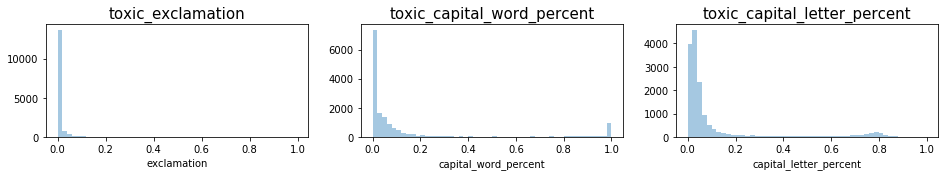

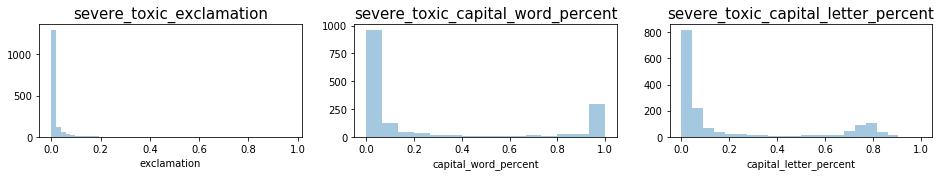

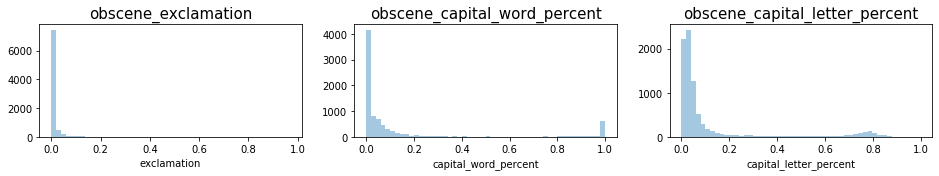

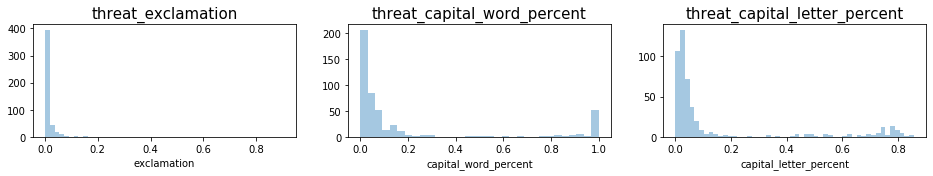

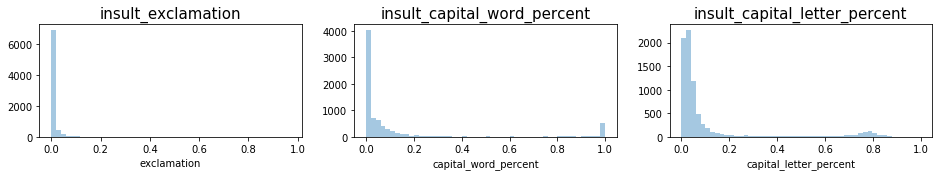

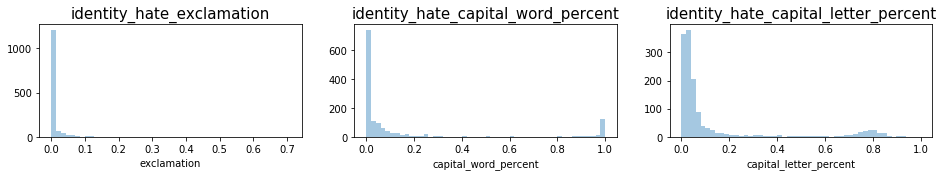

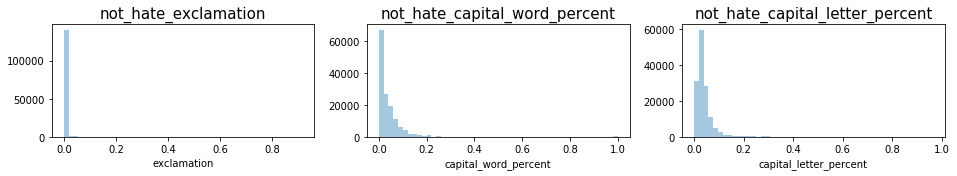

In [9]:
add_info = ['exclamation', 'capital_word_percent', 'capital_letter_percent']
df_eda = df.copy()

for i in col:
    plt.figure(figsize=(16,12))
    for j,k in zip(range(1,16), add_info):
        plt.subplot(5,3,j)
        sns.distplot(df_eda[df_eda[i]==1][k], kde=False)
        plt.title('{}_{}'.format(i,k),{'fontsize':15})
    plt.show()

In [10]:
freq_dist={}
for i in df_eda['comment_text']:
    x=i.split()
    for j in x:
        if j not in freq_dist.keys():
            freq_dist[j]=1
        else:
            freq_dist[j]+=1
a = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
print(a[0:15])

[('the', 445987), ('to', 288817), ('of', 219334), ('and', 207381), ('a', 201817), ('I', 183930), ('is', 164639), ('you', 157272), ('that', 140545), ('in', 130262), ('for', 96010), ('it', 92651), ('on', 84453), ('not', 83944), ('"', 81755)]


In [11]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [12]:
print(correlation_ratio(df_eda['hate'], df_eda['exclamation']))
print(correlation_ratio(df_eda['hate'], df_eda['capital_letter_percent']))
print(correlation_ratio(df_eda['hate'], df_eda['capital_word_percent']))

0.12942482647345316
0.21538775089181975
0.21898833925886982


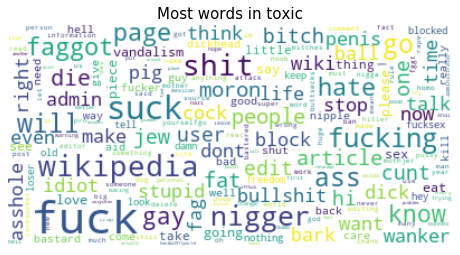

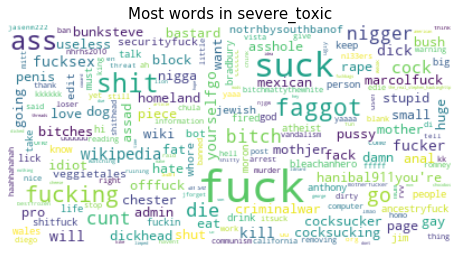

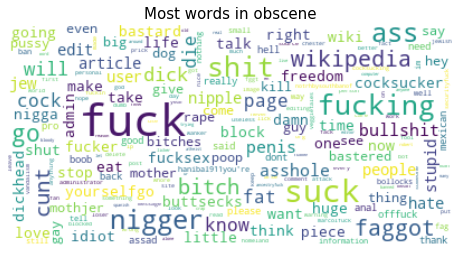

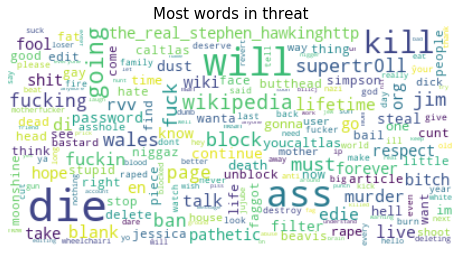

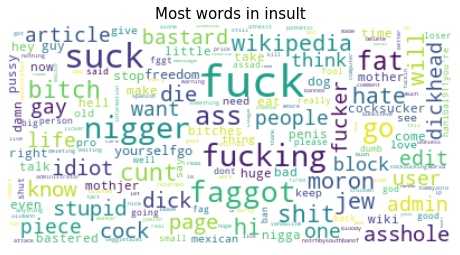

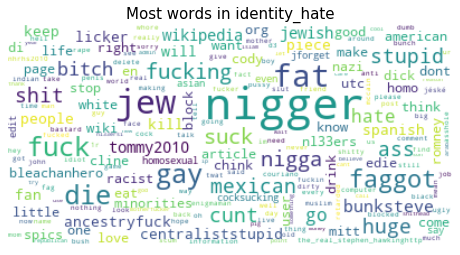

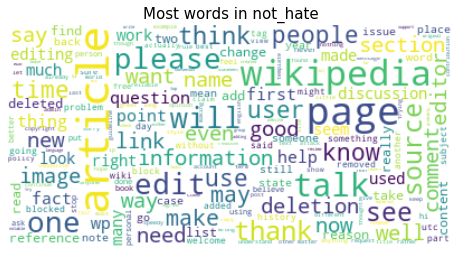

In [13]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_hate']
# col = ['toxic', 'severe_toxic']
for i in col:
    text = ''
    df_temp = df_eda[df_eda[i]==1]['comment_text'].reset_index(drop=True)
    for j in range(len(df_temp)):
        text += df_temp[j]
    wordcloud = WordCloud(max_font_size=40, collocations=False, background_color='white').generate(text.lower())
    plt.figure(figsize=(8,8))
    plt.title('Most words in {}'.format(i),{'fontsize':15})
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [14]:
def clean(comment):

    comment=comment.lower()
    comment = re.sub(r'\\n','',comment)
    comment = re.sub(r'wikipedia:.*#[\.\S]+[a-z]', '', comment)
    comment = re.sub(r'http[\.\S]+[\.\S]', '', comment)
    comment = re.sub(r'[0-9\.\:]*[0-9]', '', comment)
    comment = re.sub(r'file:.*jpg', '', comment)
    comment = re.sub(r'\.gif', '', comment)
    comment = re.sub(r'\[\[user(.*)\|', '', comment)
    comment = re.sub(r'www[\.\S]+[\.\S]','', comment)
    comment = re.sub(r'http', '', comment)
    
    # add wikipedia to reduce size
    comment = re.sub(r'wikipedia', '', comment)

    #Split the sentences into words
    words = tokenizer.tokenize(comment)
    
    whitelist = ["not", "no"]
    words = [APPO[word] if word in APPO else word for word in words]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [word.split() for word in words]
    words = [item for sublist in words for item in sublist]
    words = [char for char in words if char not in string.punctuation]
    words = [word for word in words if (word not in eng_stopwords or word in whitelist) and len(word) > 1]
    words = [lem.lemmatize(word, "v") for word in words]
    
    clean_sent=" ".join(words)
    
    b = re.findall("[\'\sa-zA-Z]", clean_sent)
    clean_sent = ''.join(b)
    return(clean_sent)

In [15]:
df_eda['clean_text'] = df_eda['comment_text'].apply(clean)

In [16]:
freq_dist={}
for i in df_eda['clean_text']:
    x=i.split()
    for j in x:
        if j not in freq_dist.keys():
            freq_dist[j]=1
        else:
            freq_dist[j]+=1
a = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
print(a[0:15])

[('not', 150302), ('article', 72236), ('page', 56480), ('edit', 40092), ('talk', 39127), ('use', 32637), ('would', 32259), ('make', 30388), ('please', 29862), ('no', 28916), ('like', 28495), ('one', 28055), ('think', 25692), ('see', 25517), ('say', 25465)]


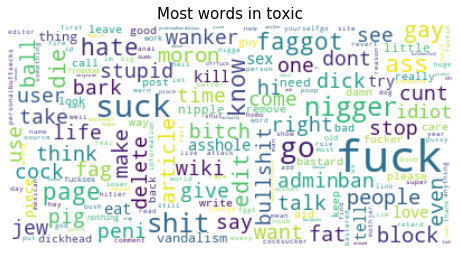

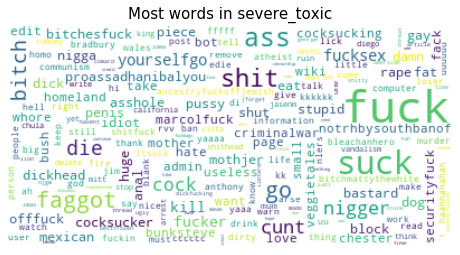

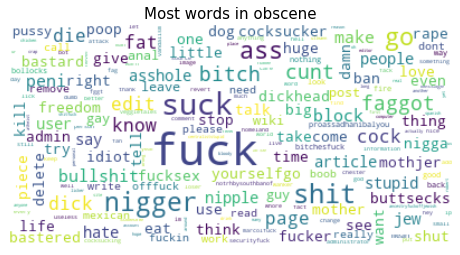

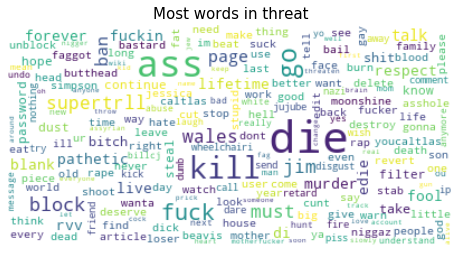

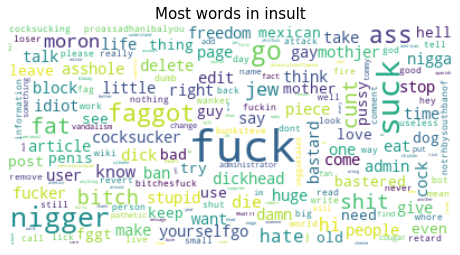

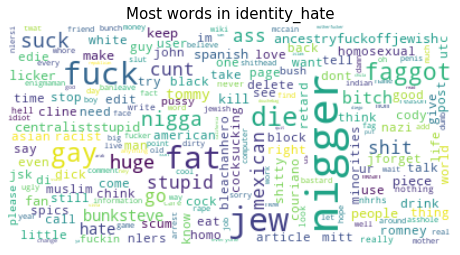

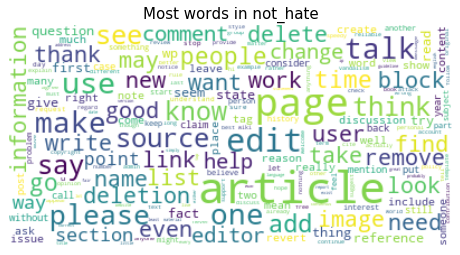

In [17]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_hate']
for i in col:
    text = ''
    df_temp = df_eda[df_eda[i]==1]['clean_text'].reset_index(drop=True)
    for j in range(len(df_temp)):
        text += df_temp[j]
    wordcloud = WordCloud(max_font_size=40, collocations=False, background_color='white').generate(text.lower())
    plt.figure(figsize=(8,8))
    plt.title('Most words in {}'.format(i),{'fontsize':15})
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [18]:
def tags(df):
    x = 0
    for i in col:
        x += df[i]
    return x

In [19]:
df_eda['num_of_tags'] = df_eda.apply(tags, axis=1)

1    149706
3      4209
2      3480
4      1760
5       385
6        31
Name: num_of_tags, dtype: int64


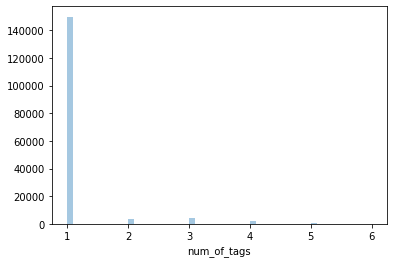

In [20]:
print(df_eda['num_of_tags'].value_counts())
sns.distplot(df_eda['num_of_tags'], kde=False)
# barplot/countplot

In [21]:
def search_bigram(columns, clean=False):
    cvec = CountVectorizer(lowercase=True, ngram_range=(2,2))
    
    if clean == False:
        data = df_eda[df_eda[columns]==1]['comment_text']
    elif clean == True:
        data = df_eda[df_eda[columns]==1]['clean_text']
    
    if columns == 'not_hate':
        data = data.sample(10000)
    else:
        data = data.sample(frac=0.5) #Maximum capacity of laptop
    
    pos_gc_matrix = (cvec.fit_transform(data))
    pos_gc_df = pd.DataFrame(pos_gc_matrix.toarray(), columns = cvec.get_feature_names())
    pos_gc_dict = {word: pos_gc_df[word].sum() for word in cvec.get_feature_names()}
    pos_gc_df = pd.DataFrame(pos_gc_dict, index = ['count'])
    pos_gc_df = pos_gc_df.T
    dfc = pos_gc_df.sort_values(by='count', ascending=False).head(10)

    plt.figure(figsize=(5,3))
    sns.barplot(x=dfc.index, y="count", data=dfc)
    plt.xticks(rotation=90)
    plt.show()

Before cleaning: toxic bigrams


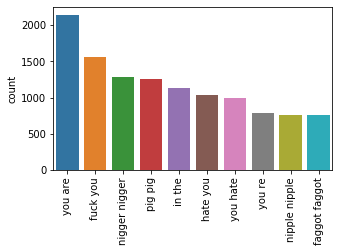

After cleaning: toxic bigrams


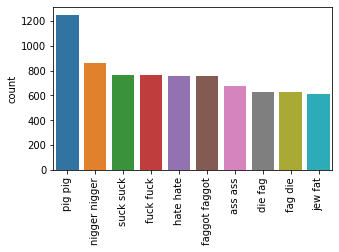

Before cleaning: severe_toxic bigrams


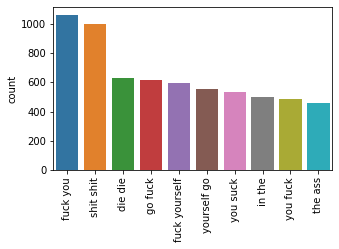

After cleaning: severe_toxic bigrams


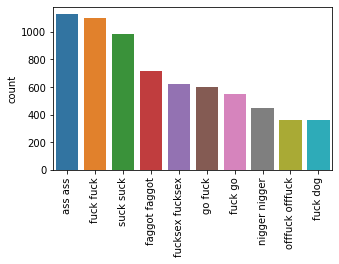

Before cleaning: obscene bigrams


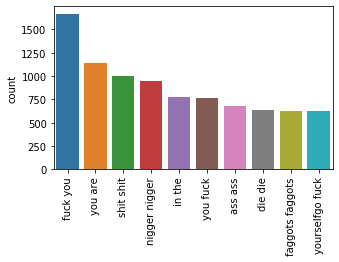

After cleaning: obscene bigrams


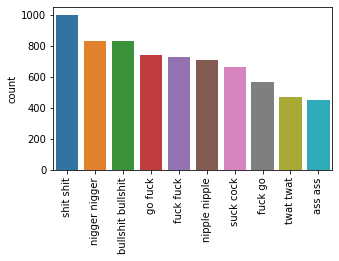

Before cleaning: threat bigrams


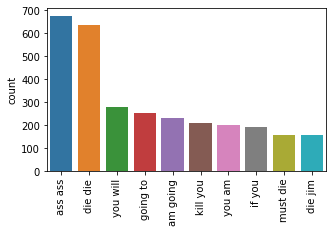

After cleaning: threat bigrams


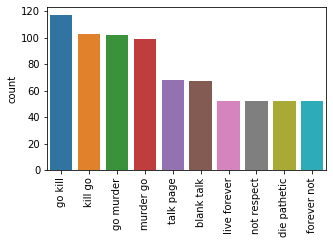

Before cleaning: insult bigrams


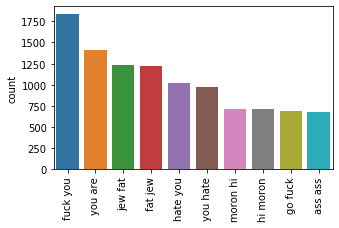

After cleaning: insult bigrams


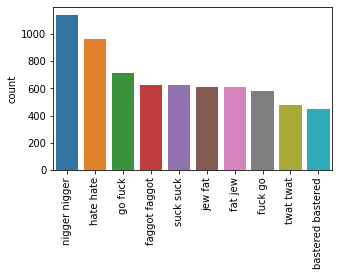

Before cleaning: identity_hate bigrams


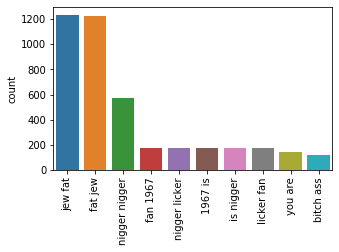

After cleaning: identity_hate bigrams


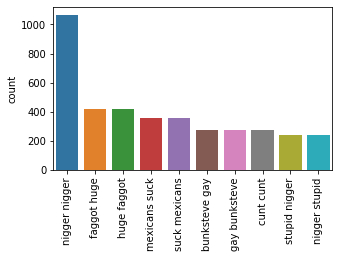

Before cleaning: not_hate bigrams


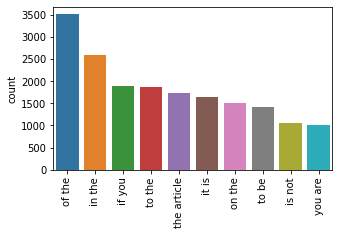

After cleaning: not_hate bigrams


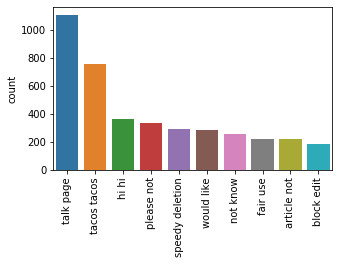

In [22]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'not_hate']
for i in col:
    print('Before cleaning: {} bigrams'.format(i))
    search_bigram(i, clean=False)
    print('After cleaning: {} bigrams'.format(i))
    search_bigram(i, clean=True)